In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1: Metropolis-Hastings

For the spatial part of Hydrogen atom, we can guess a wave function $\Psi_{T,\alpha} \propto e^{-\alpha r}$. So, $E_{Local}$ is equal to

$$ E_L = \frac{\hat{H}\,\Psi_{T,\alpha}}{\Psi_{T,\alpha}} = -\frac{1}{2}\left(\alpha^2 - 2\frac{\alpha}{r} \right) - \frac{1}{r}\,. $$

Now we need to calculate the best-fit value for $\alpha$. Note that there are 3 more complications here compared to the question from the last problem set.

1. $r$ here is not Cartesian but is the spatial part of spherical coordinates.

2. $E_L$ at $\alpha = 1$ becomes independent of $r$ (Spoiler: this is infact the correct answer).

3. For $\alpha \ne 1$ there's a singularity at $r = 1$ in which the potential diverges.

## (a)

Like before, write a function to preform a Metropolis-Hastings algorithm to find a distribution for $r$ at a defined $\alpha$ this time using a non-symmetric $Q(x^\prime; x)$ as discussed in the lecture.

P.S. Use two different functions for $Q$ at your choise.

In [39]:
def P(alpha, r):
    return np.exp(-2 * alpha * r)


In [40]:
def Q(r, r0):
    return np.exp(-r / r0)

In [41]:
def w(alpha, x_new, x_old):
    return (P(alpha, r_new) * Q(r_new, r_old)) / (P(alpha, r_old) * Q(r_new, r_old))

In [42]:
x_old = np.random.uniform(0, 1)
y_old = np.random.uniform(0, 1)
z_old = np.random.uniform(0, 1)
r_old = np.sqrt(x_old ** 2 + y_old ** 2 + z_old ** 2)

## (b)

Plot histograms for $r$ with different sizes for each choise of $Q$ and compare them to each other and the analytical function. Which choise of $Q$ is better? Do you think there's a mathematical reason behind this?

In [43]:
def P(alpha,r):
  return np.exp(-2*alpha*r)

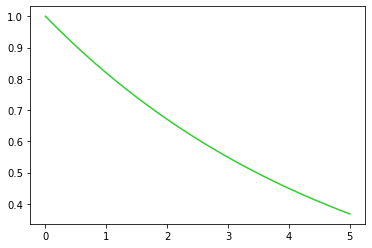

In [44]:
x = np.linspace(0, 5, 1000)
plt.plot(x, P(.1, x) , color = "limegreen")

In [45]:
def w(alpha,x1st,x2nd):
    return P(alpha,x2nd)/P(alpha,x1st)

In [46]:
def Q(R,x1st,x2nd):
    
    return (1+x2nd)/(2+x1st)

In [47]:
def Metropolice(alpha,n,x1st, x2nd,R):
    points=[x1st]

    for j in range(n):
      a = w(alpha,x1st,x2nd)* Q(R,x1st,x2nd)/Q(R,x2nd,x1st)
      rand= np.random.rand()

      if a >=1 or a>=rand :
        points.append(x2nd)
        newrand=  np.random.rand()*R 
        while newrand==0:
          newrand= np.random.rand()*R
        x1st, x2nd= x2nd, newrand

      else :
        points.append(x1st)
        x1st, x2nd= x1st,x1st

    return points

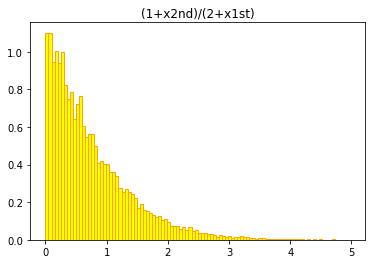

In [48]:
points=Metropolice(1,100000,.2,.3,5)
plt.title('(1+x2nd)/(2+x1st)')
plt.hist(points, bins=100, density=True, color = "yellow", edgecolor ="orange");

In [49]:
def Q(R,x1st,x2nd):
   
    the= ( x1st/R )*np.pi
    return np.sin(the)+ x2nd

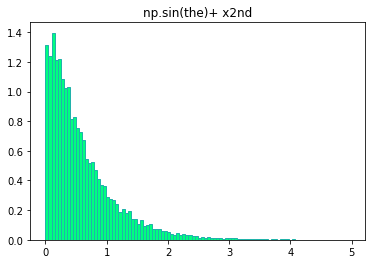

In [50]:
points=Metropolice(1,100000,.2,.3,5)
plt.title('np.sin(the)+ x2nd')
plt.hist(points, bins=100, density=True , color = "springgreen", edgecolor ="lightseagreen");

## (c)

As before, plot $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ for different values of $\alpha$ and show that indeed $\alpha = 1$ is the best-fit value.

In [51]:
from scipy import integrate

In [52]:
def mean_sigma2(la):
  
  e= lambda xraw: ( -.5*(la**2-2*la/xraw)-1/xraw ) * P(la,xraw)
  e2= lambda xraw: ( (-.5*(la**2-2*la/xraw)-1/xraw) **2 ) * P(2*la,xraw)

  mean=  integrate.quad(e,-np.inf,np.inf)[0]
  var=  integrate.quad(e2,-np.inf,np.inf)[0] - mean**2

  return [mean , var ]

In [53]:
la= np.arange(0,3,.01)
n=100
resp=np.zeros(n+1)
for i in la:
  resp= np.vstack((resp,Metropolice(2,n,-2,-1,i)))

C:\Users\mobin\AppData\Local\Temp/ipykernel_13108/740781174.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  the= ( x1st/R )*np.pi
C:\Users\mobin\AppData\Local\Temp/ipykernel_13108/740781174.py:4: RuntimeWarning: invalid value encountered in sin
  return np.sin(the)+ x2nd


# Q2: FFT (warm up)

## (a)
Using `'scipy.fft'`, calculate and the fourier modes of $x(t) = 2\sin(t) + \sin(10t)$. Plot the absolute values.

In [54]:
from scipy.fft import fft, fftshift, fftfreq

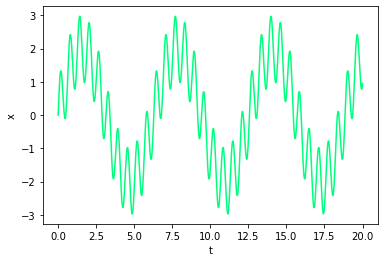

In [55]:
n = 1000
ti = 0
tf = 20
step = (tf - ti) / n
t = np.linspace(ti, tf, n)
x = 2 * np.sin(t) + np.sin(10 * t)
plt.plot(t, x , color ="springgreen")
plt.xlabel('t')
plt.ylabel('x')
plt.show()

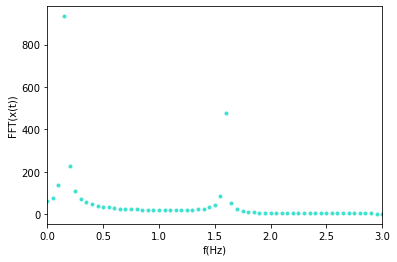

In [56]:
t_fft = fftfreq(n, step)
x_fft = fft(x)
plt.plot(t_fft, np.abs(x_fft), '.' , color = "turquoise")
plt.xlabel('f(Hz)')
plt.ylabel('FFT(x(t))')
plt.xlim([0, 3])
plt.show()

What's the prominent frequency? Does it make sense? If not, what's wrong with the code?

## (b)

Calculate and plot Fourier transform of sawtooth function.

In [57]:
from scipy.signal import sawtooth

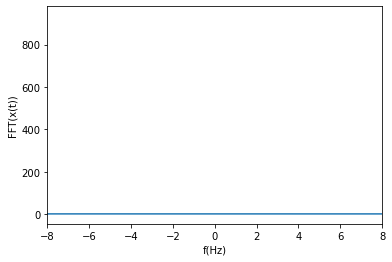

In [58]:
t_fft = fftshift(t_fft)
plt.plot(t_fft, np.abs(x_fft))
plt.xlabel('f(Hz)')
plt.ylabel('FFT(x(t))')
plt.xlim([-8, 8])
plt.show()

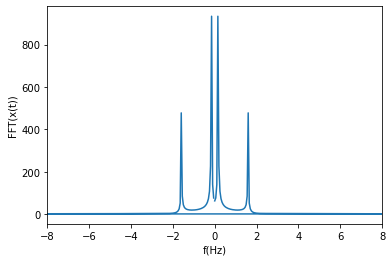

In [59]:
t_fft = fftshift(t_fft)
plt.plot(t_fft, np.abs(x_fft))
plt.xlabel('f(Hz)')
plt.ylabel('FFT(x(t))')
plt.xlim([-8, 8])
plt.show()

# Q3: Sunspot data

The attached file `Sunspots.csv` contains monthly solar activity data over a 272 year period. First read the data in a pandas Dataframe and tell pandas to interpret the second column as `datetime`.

In [81]:
Sunm = pd.read_csv('Sunspots.csv')
Sunm.head()

,Num,Date,Monthly
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [82]:
Sunm.drop(columns = Sunm.columns[0], axis = 1, inplace= True)
Sunm.columns = ['Date(Monthly)', 'Intensity']
Sunm['Date(Monthly)'] = pd.to_datetime(Sunm['Date(Monthly)'])
Sunm.head()

,Date(Monthly),Intensity
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


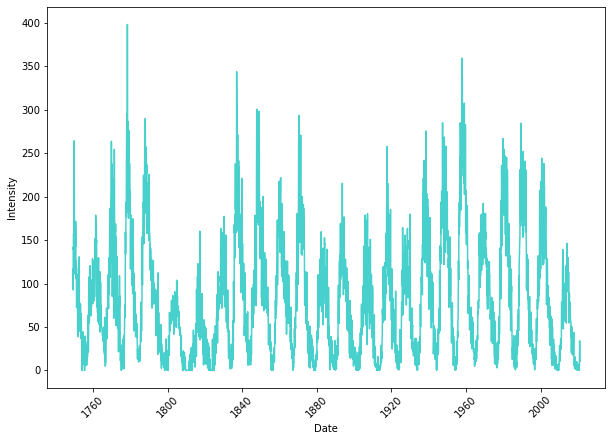

In [84]:
plt.figure(figsize = (10, 7))
plt.plot(Sunm['Date(Monthly)'], Sunm['Intensity'], color = 'mediumturquoise')
plt.xlabel('Date')
plt.ylabel('Intensity')
plt.xticks(rotation = '45')
plt.show()

## (a)

Do an appropriate Fourier analysis to determine the main cylce of solar activity. What's the period?

In [88]:
Date_fft = fftfreq(len(Sunm['Date(Monthly)']), 1)
Intensity = Sunm['Intensity'].values
Intensity = (Intensity - np.mean(Intensity)) / np.std(Intensity)
Intensity_fft = fft(Intensity)

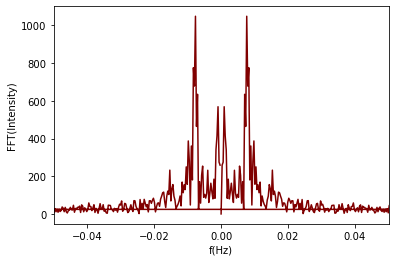

In [89]:
plt.plot(Date_fft, np.abs(Intensity_fft) , color = "maroon")
plt.xlabel('f(Hz)')
plt.ylabel('FFT(Intensity)')
plt.xlim([-0.05, 0.05])
plt.show()

## (b)
First do an inverse Fourier analysis to confirm that you get back the same data.

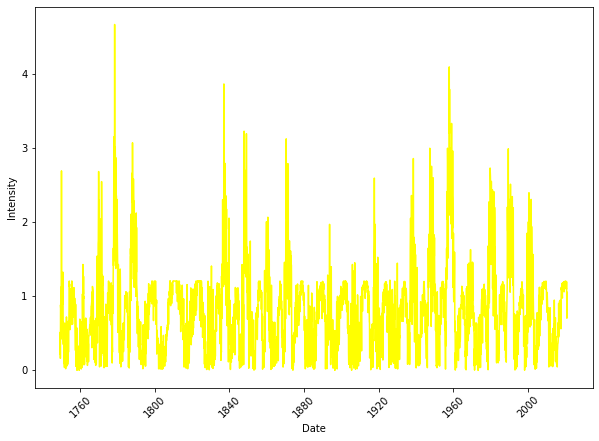

In [90]:
from scipy.fft import ifft
plt.figure(figsize = (10, 7))
Intensity_fft_ifft = ifft(Intensity_fft)
plt.plot(Sunm['Date(Monthly)'], np.abs(Intensity_fft_ifft) , color = "yellow")
plt.xlabel('Date')
plt.ylabel('Intensity')
plt.xticks(rotation = '45')
plt.show()

## (c)

Remover the first ten biggest values of Fourier transformed series, do an inverse transform once more and plot the results.

Why does the plot look different? And what's the difference?

In [66]:
# Explain here ...

# Q4: Correlation function and power spectrum

Remember from last homework that we calculated autocorrelation function for a data that we made?

Load the data saved as `2pcf.txt`, calculate the correlation function once more and then plot the power spectrum using that data.

In [67]:
pcf=pd.read_csv('2pcf.txt',names=['pcf'])
pcf.head()

,pcf
0,0.0000
1,-0.5803
2,-0.9645
3,-0.7912
4,-0.6154


array([[<AxesSubplot:title={'center':'pcf'}>]], dtype=object)

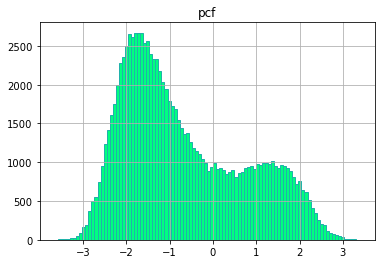

In [69]:
pcf.hist(bins=100 , color = "springgreen", edgecolor ="lightseagreen" )

so beautifullll :D

In [71]:
sun= pcf.pcf.values
sun=sun-np.mean(sun)
sun= sun/np.std(sun)

autocorrelation=np.correlate(sun, sun, mode="full") 
autocorrelation = autocorrelation[autocorrelation.size//2:]

In [74]:
Fa=fft( autocorrelation )
Ka=fftfreq(len(pcf),1)

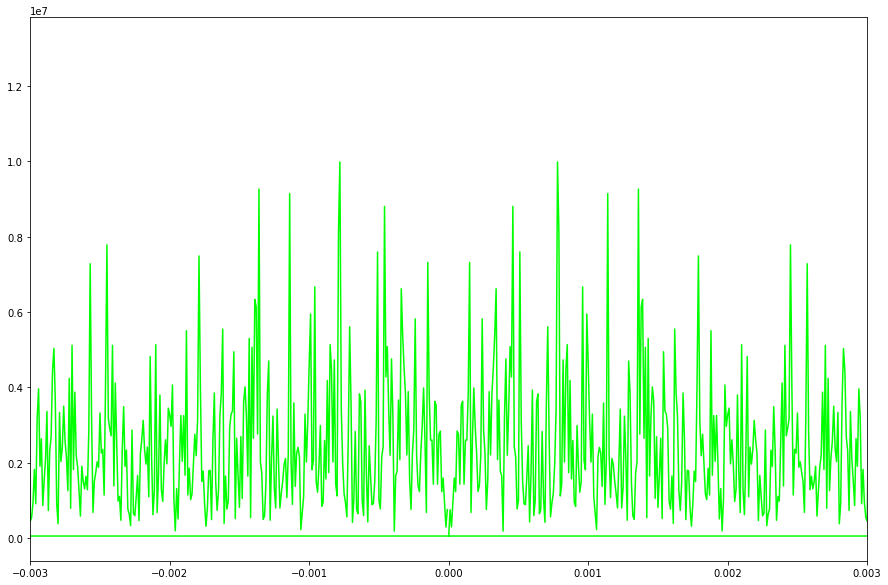

In [76]:
plt.figure( figsize=(15,10) )
plt.xlim(-.003,.003)
plt.plot(Ka,abs(Fa) , color = "lime")

# Q5: Real world example (Bonous question)

The two point correlation function is like autocorrelation but for multi-dimensional data. Here instead of "lags" we use distances.

The file `cmb_camb_N1024_PS12.npy` is part of the CMB temperature map, you can read it directly using `np.load` function.

Calculate the two point correlation for the CMB map, plot it, and then calculate the power spectrum and plot it too.

P.S. the provided data is 1024$\times$1024, it needs too much computational power to calculate correlation for every point. You may use only a fraction of data points, if they are chosen randomly, the result would be the same. Also for the distances, you do not need to cover the whole length of the image.

In [30]:
...

Ellipsis

In [31]:
# Your answers here